In [157]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
import string
import nltk
from wordcloud import WordCloud
from collections import Counter

In [158]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
genshinUS_reviews = pd.read_csv('/content/GenshinUS-AppStore-Reviews.csv')
genshinUS_reviews.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2024-03-14 21:13:53,If your into anything action related or into g...,4,False,Paimon ✨,Beautiful (also mid) 😌,NaN
1,2024-03-12 23:53:32,I’ve been playing genshin off and on for years...,5,False,Dreamercorngirl,Addiction unlocked✅,NaN
2,2021-07-29 20:38:39,this game is the best game I’ve ever downloade...,5,False,✨Paimon✨,best game in the universe! <3,NaN
3,2020-10-12 17:38:12,I’m one of those people who Judges a game by i...,5,False,... well then.,Surprised,NaN
4,2021-02-18 13:20:18,This game is insane. I’ve played now for a tot...,5,False,CraftiBadger,AAA Title for free,NaN


Exploratory Data Analysis (EDA)

In [160]:
print(genshinUS_reviews.info())
print(genshinUS_reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               2000 non-null   object
 1   review             2000 non-null   object
 2   rating             2000 non-null   int64 
 3   isEdited           2000 non-null   bool  
 4   userName           2000 non-null   object
 5   title              2000 non-null   object
 6   developerResponse  15 non-null     object
dtypes: bool(1), int64(1), object(5)
memory usage: 95.8+ KB
None
           rating
count  2000.00000
mean      3.88950
std       1.44891
min       1.00000
25%       3.00000
50%       5.00000
75%       5.00000
max       5.00000


In [161]:
print(genshinUS_reviews.dtypes)

date                 object
review               object
rating                int64
isEdited               bool
userName             object
title                object
developerResponse    object
dtype: object


In [162]:
# Check for missing values
genshinUS_reviews.isna().sum()

date                    0
review                  0
rating                  0
isEdited                0
userName                0
title                   0
developerResponse    1985
dtype: int64

In [163]:
genshinUS_reviews = genshinUS_reviews.drop('developerResponse', axis = 1)
genshinUS_reviews.head()

,date,review,rating,isEdited,userName,title
0,2024-03-14 21:13:53,If your into anything action related or into g...,4,False,Paimon ✨,Beautiful (also mid) 😌
1,2024-03-12 23:53:32,I’ve been playing genshin off and on for years...,5,False,Dreamercorngirl,Addiction unlocked✅
2,2021-07-29 20:38:39,this game is the best game I’ve ever downloade...,5,False,✨Paimon✨,best game in the universe! <3
3,2020-10-12 17:38:12,I’m one of those people who Judges a game by i...,5,False,... well then.,Surprised
4,2021-02-18 13:20:18,This game is insane. I’ve played now for a tot...,5,False,CraftiBadger,AAA Title for free


In [164]:
# Convert date column to datetime
genshinUS_reviews['date'] = pd.to_datetime(genshinUS_reviews['date'])

In [165]:
# Basic statistics for ratings
genshinUS_reviews['rating'].describe()

count    2000.00000
mean        3.88950
std         1.44891
min         1.00000
25%         3.00000
50%         5.00000
75%         5.00000
max         5.00000
Name: rating, dtype: float64

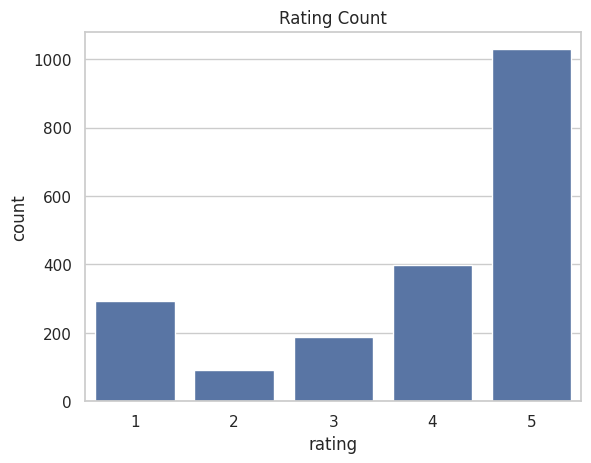

In [166]:
sns.countplot(genshinUS_reviews, x='rating')
plt.title('Rating Count')
plt.show()

In [167]:
genshinUS_reviews['sentiment'] = genshinUS_reviews['rating'].apply(lambda rating : +1 if rating > 3 else -1)

# split df - positive and negative sentiment:
positive = genshinUS_reviews[genshinUS_reviews['sentiment'] == 1]
negative = genshinUS_reviews[genshinUS_reviews['sentiment'] == -1]

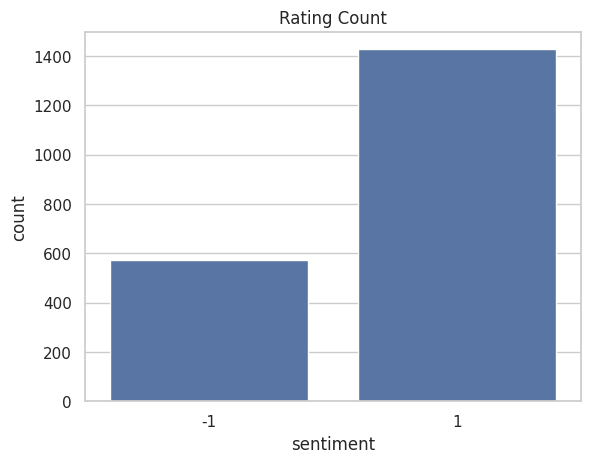

In [168]:
sns.countplot(genshinUS_reviews, x='sentiment')
plt.title('Rating Count')
plt.show()

We can see that there is an imbalance between the 2 classes

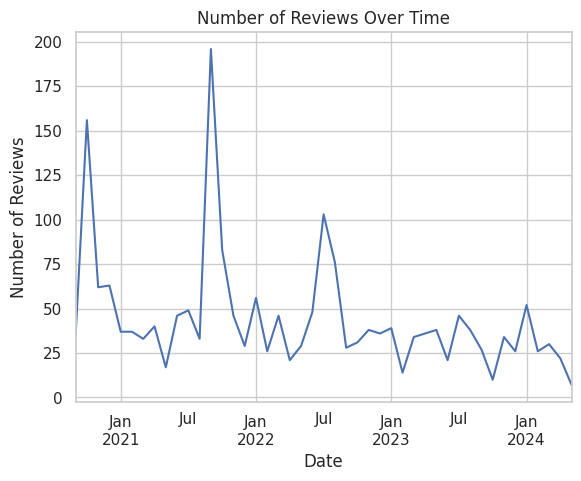

In [169]:
# Distribution of reviews over time
genshinUS_reviews.set_index('date').resample('M').count()['review'].plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

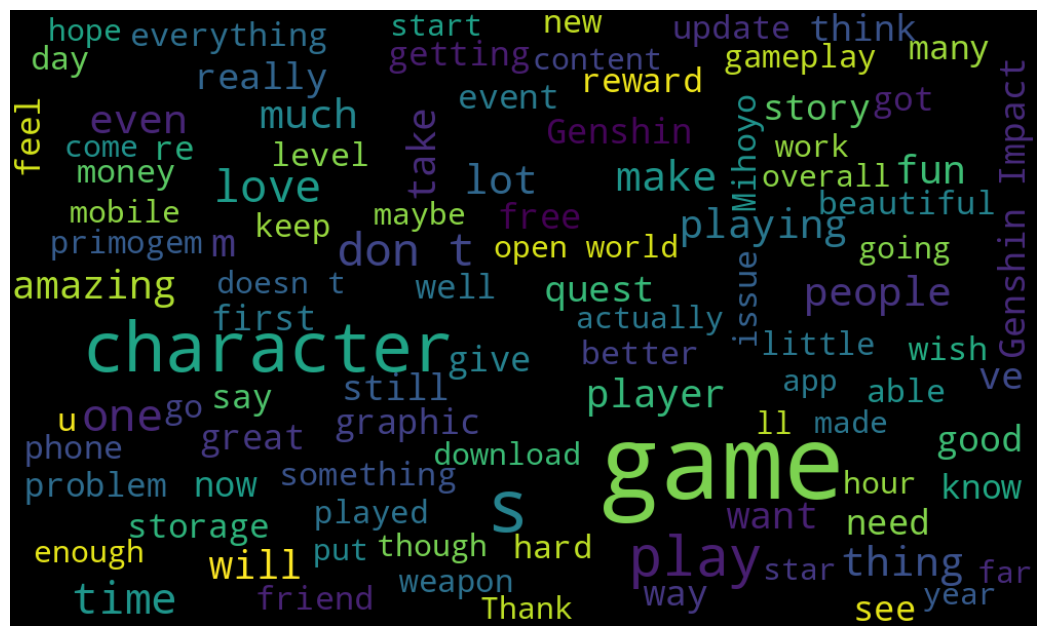

In [170]:
txt = ' '.join(rev for rev in genshinUS_reviews.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

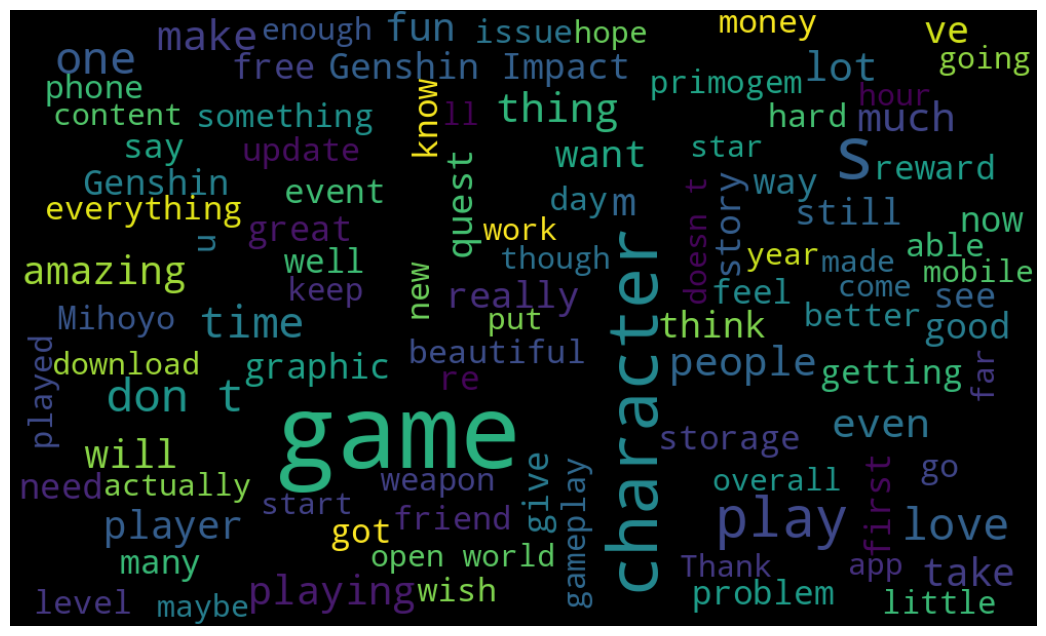

In [171]:
# Postive sentiment wordcloud
pos = " ".join(review for review in positive.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

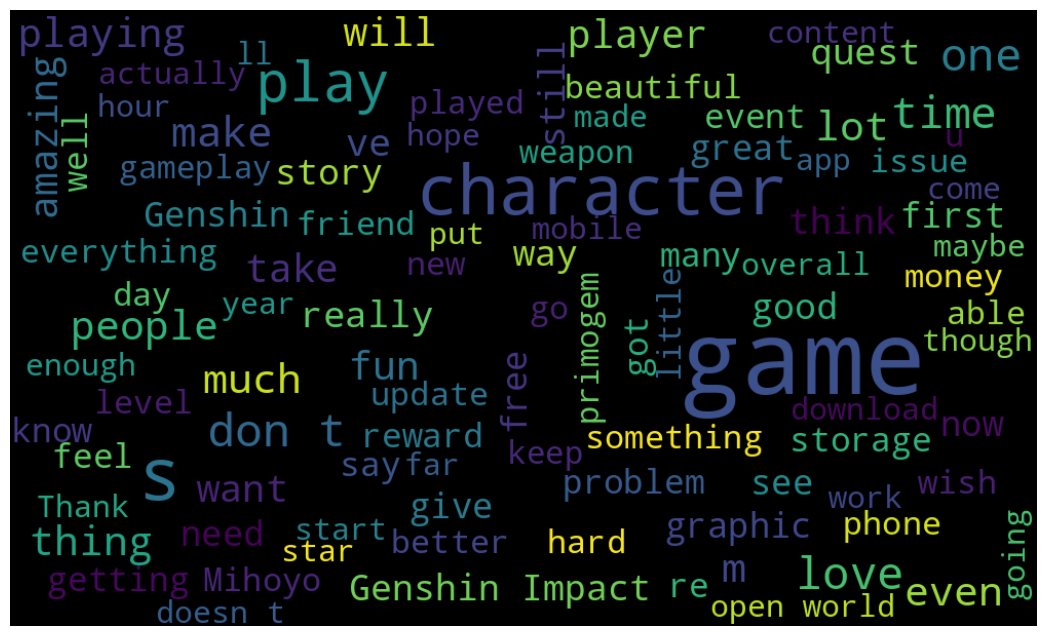

In [172]:
# Negative sentiment wordcloud
neg = " ".join(review for review in negative.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Num_word_review', ylabel='Count'>

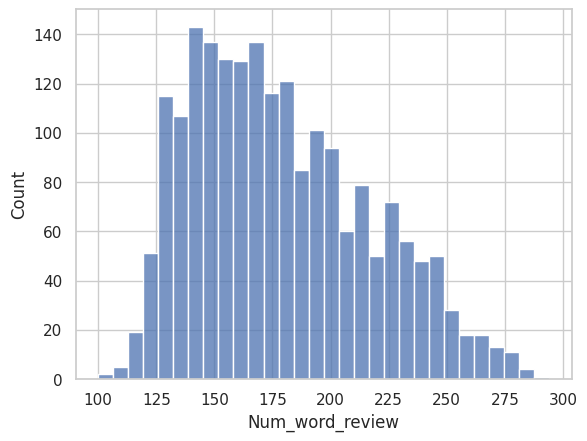

In [173]:
# Distribution of num of reviews
USreview_copy = genshinUS_reviews.copy()
USreview_copy['Num_word_review'] = USreview_copy['review'].apply(lambda x:len(str(x).split()))

sns.histplot(data=USreview_copy, x = 'Num_word_review', bins=30)

Most reviews contain about 130 to 185 words

In [174]:
# Dist of words in all reviews
USreview_copy['temp_list'] = USreview_copy['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in USreview_copy['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,14009
1,and,11168
2,to,10467
3,I,9901
4,a,7783
5,is,6244
6,of,5715
7,game,5644
8,it,4770
9,you,4632


We see that the most common words are stopwords. Hence we will need to remove them.

Data Preprocessing

In [175]:
def clean(raw):
    # Remove hyperlinks and markup
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [176]:
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
stop=set(stopwords.words("english"))


def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [177]:
def preprocessing(df,col):
    df[col] = df[col].apply(clean)
    df[col] = df[col].apply(deEmojify)
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(remove_num)
    df[col] = df[col].apply(remove_symbols)
    df[col] = df[col].apply(remove_punctuation)
    df[col] = df[col].apply(remove_stopword)
    df[col] = df[col].apply(unify_whitespaces)
    df[col] = df[col].apply(Stemming)


In [178]:
preprocessing(USreview_copy, 'review')

In [179]:
USreview_copy[['review']].head()

,review
0,anyth action relat game quest whatev genshin r...
1,play genshin year first much fan got back real...
2,game best game ever download great open word g...
3,one peopl judg game video screenshot price pla...
4,game insan play total day accord hoyolab easil...


In [180]:
# Dist of words in all reviews
USreview_copy['temp_list'] = USreview_copy['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in USreview_copy['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,8333
1,charact,3372
2,play,3209
3,get,2905
4,like,2010
5,realli,1405
6,time,1313
7,love,1306
8,genshin,1281
9,one,1200


<ipython-input-181-58871380abef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))
<ipython-input-181-58871380abef>:4: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))


<Axes: xlabel='count', ylabel='Common_words'>

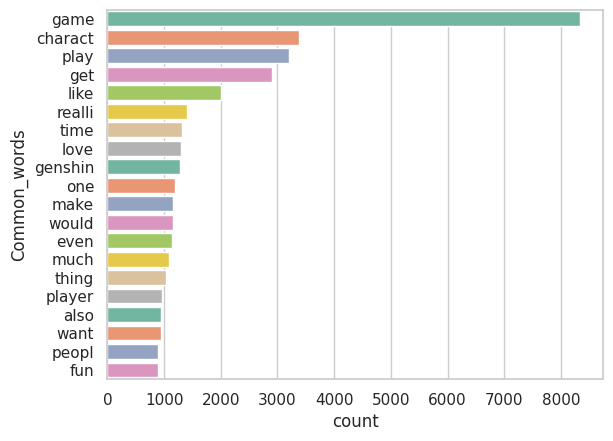

In [181]:
# Plot them
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 8)
sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))

Sentiment Analysis

In [182]:
from textblob import TextBlob

In [183]:

def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

sentiments = [analyze_sentiment(review) for review in USreview_copy['review']]

In [184]:
sentiments

[0.09404761904761905,
 0.18244348244348246,
 0.30986260116694897,
 0.06354166666666666,
 0.027586206896551727,
 -0.03223114604693553,
 0.0999107142857143,
 0.09407407407407405,
 -0.021604278074866305,
 0.10535714285714286,
 -0.02772108843537416,
 0.09976190476190476,
 -0.012962962962962966,
 -0.14624999999999996,
 0.08461538461538462,
 0.08302469135802466,
 -0.041424242424242426,
 -0.056481481481481494,
 -0.011560150375939847,
 0.017305996472663128,
 0.021874999999999985,
 0.11388888888888887,
 0.1388888888888889,
 0.022651515151515145,
 0.08086124401913874,
 0.09416666666666668,
 0.0422979797979798,
 -0.12014610389610389,
 -0.004940711462450589,
 0.055260942760942754,
 -0.07340909090909092,
 0.21753535353535355,
 0.05196078431372551,
 0.01699380165289256,
 -0.11511363636363633,
 0.07863005050505055,
 0.02564646464646463,
 -0.17069559228650133,
 0.25887445887445887,
 -0.06794871794871793,
 0.06749999999999998,
 0.010458152958152953,
 0.07916666666666666,
 -0.01198757763975155,
 0.04384

Topic modelling

In [185]:
!python -m spacy download en_core_web_md -qq

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [186]:
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
# Creating pipeline for tokenizing and modelling
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for review in nlp.pipe(USreview_copy['review']):
   proj_tok = [token.lemma_.lower() for token in review if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [ ]:
USreview_copy['tokens'] = tokens
USreview_copy['tokens']

In [ ]:
dictionary = Dictionary(USreview_copy['tokens'])

print(dictionary.token2id)

In [ ]:
# filter out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 w
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

corpus = [dictionary.doc2bow(rev) for rev in USreview_copy['tokens']]

In [ ]:
# Model building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [ ]:
# Optimal no. of topics? Calculate coherence score using C_v
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = USreview_copy['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()
plt.show()

We see that maximum coherence score occurs at around 7 topics.

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=7, workers = 4, passes=100)

In [ ]:
lda_model.print_topics(-1)

In [ ]:
print('Review: ', genshinUS_reviews['review'][0])
print('Topic: ', lda_model[corpus][0])
# According to the LDA model, the above review belongs to topic 5 (35.6%) and 6 (63.6%)

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

The above chart represents our five topics as circles. Topics closer to each other are more related.

In [ ]:
USreview_copy['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(USreview_copy['review']))]

In [ ]:
USreview_copy.topic.value_counts()

In [203]:
genshinUS_reviews.columns

Index(['date', 'review', 'rating', 'isEdited', 'userName', 'title',
       'sentiment', 'random_number'],
      dtype='object')

Sentiment Analysis

In [205]:
X = genshinUS_reviews['review']
y = genshinUS_reviews['sentiment']

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91       288
           1       0.89      0.93      0.91       284

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.91      0.91       572

